# Infographic
## Amazon Prime TV Shows Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

# Plot Style
plt.style.use('ggplot')

In [2]:
# Read DataFrame
df = pd.read_csv("amazonPrime.csv", encoding="iso-8859-1")

# Preview DataFrame
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    404 non-null    int64  
 1   Name of the show         393 non-null    object 
 2   Year of release          393 non-null    float64
 3   No of seasons available  393 non-null    float64
 4   Language                 393 non-null    object 
 5   Genre                    393 non-null    object 
 6   IMDb rating              182 non-null    float64
 7   Age of viewers           393 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.4+ KB


In [4]:
# Checking our missing values.
df.isnull().sum()

S.no.                        0
Name of the show            11
Year of release             11
No of seasons available     11
Language                    11
Genre                       11
IMDb rating                222
Age of viewers              11
dtype: int64

In [5]:
# Getting the percentage of missing values in IMDb rating.
(df['IMDb rating'].isnull().sum() / df.shape[0]) * 100

54.95049504950495

In [6]:
# Dropping the "S.no" column which is not helpful.
df.drop(['S.no.'], axis = 1, inplace = True)

In [7]:
# Renaming columns.
df = df.rename(columns= {'Name of the show':'TV_show','Year of release':'Year','No of seasons available':'Seasons','Age of viewers':'Rated'})

In [8]:
# Dropping the all missing values.
df.dropna()

,TV_show,Year,Seasons,Language,Genre,IMDb rating,Rated
0,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...
373,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


In [9]:
df.describe()

,Year,Seasons,IMDb rating
count,393.000000,393.000000,182.000000
mean,2011.279898,2.608142,7.354396
std,12.944861,2.592008,0.959372
min,1926.000000,1.000000,3.700000
25%,2011.000000,1.000000,6.900000
50%,2016.000000,2.000000,7.500000
75%,2018.000000,3.000000,8.100000
max,2020.000000,20.000000,9.000000


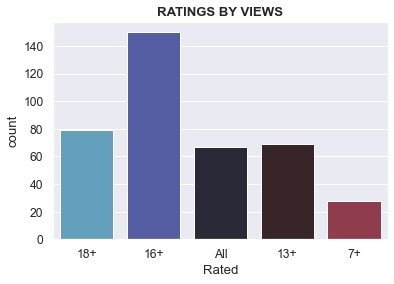

In [10]:
sns.set(style="darkgrid", palette="icefire", font_scale=1.1)
ax = sns.countplot(x = "Rated", data = df)
plt.title("RATINGS BY VIEWS", fontweight='bold');

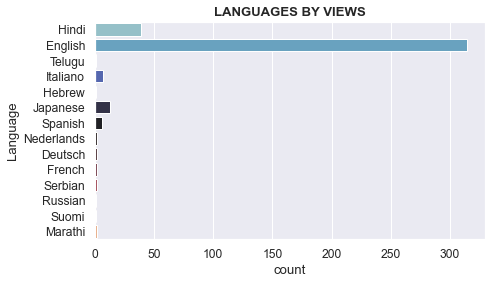

In [11]:
f, ax = plt.subplots(figsize=(7, 4))
sns.set(font_scale=1.1)
sns.countplot(y = "Language", data = df, palette ='icefire')
plt.title("LANGUAGES BY VIEWS", fontweight='bold');

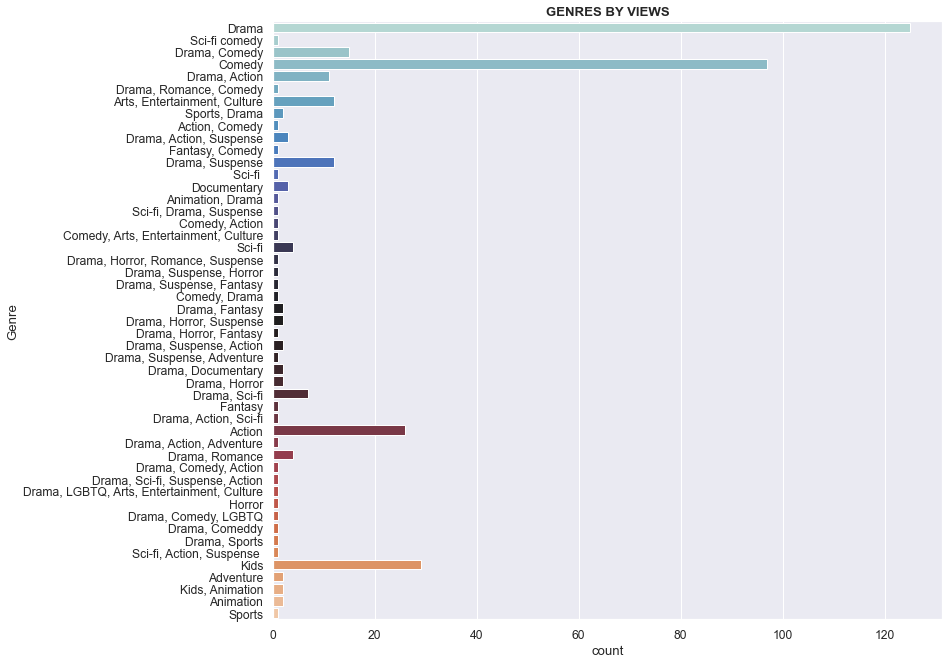

In [12]:
f, ax = plt.subplots(figsize=(12, 11))
sns.set(font_scale=1.1)
sns.countplot(y = "Genre", data = df, palette ='icefire')
plt.title("GENRES BY VIEWS", fontweight='bold');

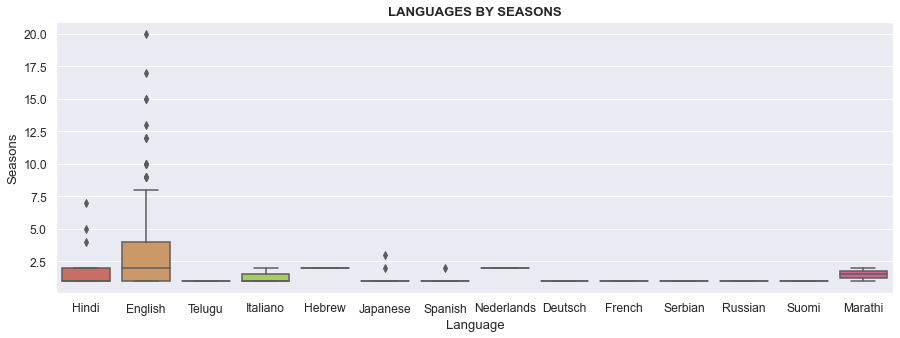

In [13]:
# Comparing IMDb ratings.
plt.figure(figsize=(15,5))
plt.title("LANGUAGES BY SEASONS",fontweight='bold')
sns.boxplot(y=df['Seasons'],x=df['Language'], palette = "hls")
plt.show()

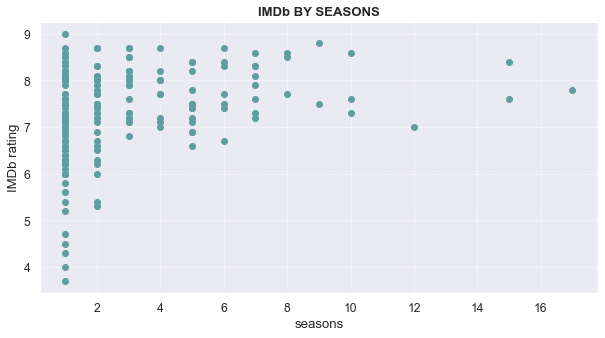

In [14]:
plt.figure(figsize=(10,5))
plt.title("IMDb BY SEASONS",fontweight='bold')
plt.xlabel("seasons")
plt.ylabel("IMDb rating")
plt.scatter(df['Seasons'], df['IMDb rating'], color = "cadetblue")
plt.grid(linestyle='dotted')
plt.show()